# 부산

## 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
busan = pd.read_excel('/content/drive/MyDrive/기계학습 2조/부산/부산어린이집기본정보조회(정기)-기준일(20241130).xls')

In [ ]:
busan.head()

,시도,시군구,어린이집명,어린이집유형구분,운영현황,우편번호,주소,어린이집전화번호,어린이집팩스번호,보육실수,...,정원수,현원수,위도,경도,통학차량운영여부,홈페이지주소,인가일자,휴지시작일자,휴지종료일자,폐지일자
0,부산광역시,중구,노틀담어린이집,국공립,정상,48904,부산광역시 중구 망양로 309 (대청동4가),051-464-0570,051-464-0573,6,...,99,51,35.105808,129.028255,운영,http://cafe.daum.net/ntdbusan,1994-10-04,NaN,NaN,NaN
1,부산광역시,중구,숲속어린이집,민간,정상,48967,부산광역시 중구 고가길 40 책방골목1길12 (보수동1가),051-256-1843,051-255-1843,6,...,82,61,35.103732,129.027688,운영,NaN,1996-02-16,NaN,NaN,NaN
2,부산광역시,중구,부평어린이집,민간,폐지,48974,부산광역시 중구 흑교로25번길 18-2,051-244-2204,--,5,...,49,0,35.102064,129.023270,운영,jg8514hanmail.net,1996-07-15,NaN,NaN,2018-03-02
3,부산광역시,중구,남포어린이집,국공립,폐지,600044,부산 중구 남포동4가 32-2,051-245-5078,051-245-5078,4,...,42,0,NaN,NaN,NaN,NaN,1998-01-01,NaN,NaN,2011-02-28
4,부산광역시,중구,천사어린이집,가정,정상,48905,"부산광역시 중구 영주로 65 102동 110호(영주동, 동아아파트)",051-464-8840,051-441-9317,4,...,19,11,35.112243,129.029798,운영,NaN,2005-01-18,NaN,NaN,NaN


In [ ]:
busan.columns

Index(['시도', '시군구', '어린이집명', '어린이집유형구분', '운영현황', '우편번호', '주소', '어린이집전화번호',
       '어린이집팩스번호', '보육실수', '보육실면적', '놀이터수', 'CCTV설치수', '보육교직원수', '정원수', '현원수',
       '위도', '경도', '통학차량운영여부', '홈페이지주소', '인가일자', '휴지시작일자', '휴지종료일자', '폐지일자'],
      dtype='object')

In [ ]:
# 삭제할 칼럼 목록
columns_to_drop = ['우편번호', '주소', '어린이집전화번호', '어린이집팩스번호', '홈페이지주소', '휴지시작일자', '휴지종료일자']

busan = busan.drop(columns=columns_to_drop)

busan.columns


Index(['시도', '시군구', '어린이집명', '어린이집유형구분', '운영현황', '보육실수', '보육실면적', '놀이터수',
       'CCTV설치수', '보육교직원수', '정원수', '현원수', '위도', '경도', '통학차량운영여부', '인가일자',
       '폐지일자'],
      dtype='object')

In [ ]:
busan.head()

,시도,시군구,어린이집명,어린이집유형구분,운영현황,보육실수,보육실면적,놀이터수,CCTV설치수,보육교직원수,정원수,현원수,위도,경도,통학차량운영여부,인가일자,폐지일자
0,부산광역시,중구,노틀담어린이집,국공립,정상,6,290,2,8,13,99,51,35.105808,129.028255,운영,1994-10-04,NaN
1,부산광역시,중구,숲속어린이집,민간,정상,6,251,2,9,18,82,61,35.103732,129.027688,운영,1996-02-16,NaN
2,부산광역시,중구,부평어린이집,민간,폐지,5,93,1,8,0,49,0,35.102064,129.023270,운영,1996-07-15,2018-03-02
3,부산광역시,중구,남포어린이집,국공립,폐지,4,96,1,0,0,42,0,NaN,NaN,NaN,1998-01-01,2011-02-28
4,부산광역시,중구,천사어린이집,가정,정상,4,57,0,4,5,19,11,35.112243,129.029798,운영,2005-01-18,NaN


In [ ]:
busan['운영현황_타겟'] = busan['운영현황'].apply(lambda x: 1 if x == '폐지' else 0)
busan['운영현황_타겟'].value_counts()

,count
운영현황_타겟,
0,1383
1,1119


In [ ]:
# 인가일자 컬럼의 데이터 타입 확인 및 변환 (필요시)
# 예시: 만약 '인가일자'가 문자열 형태라면 datetime 형식으로 변환
busan['인가일자'] = pd.to_datetime(busan['인가일자'], errors='coerce')

# 2008년 이후 데이터만 추출
busan = busan[busan['인가일자'].dt.year >= 2008]

busan.head()
busan['운영현황_타겟'].value_counts()

,count
운영현황_타겟,
0,627
1,302


## 전처리

### 1. 현원수 칼럼 삭제

In [ ]:
len(busan)

929

In [ ]:
# 1. 현원수 칼럼 삭제

busan = busan.drop(columns=['현원수'])
busan.columns

Index(['시도', '시군구', '어린이집명', '어린이집유형구분', '운영현황', '보육실수', '보육실면적', '놀이터수',
       'CCTV설치수', '보육교직원수', '정원수', '위도', '경도', '통학차량운영여부', '인가일자', '폐지일자',
       '운영현황_타겟'],
      dtype='object')

### 정원수 0인 데이터 삭제

In [ ]:
# 정원수 0인 데이터 개수 확인
zero_count = (busan['정원수'] == 0).sum()
print(zero_count)

# 정원수 0인 데이터 확인
zero_rows = busan[busan['정원수'] == 0]
zero_rows

5


,시도,시군구,어린이집명,어린이집유형구분,운영현황,보육실수,보육실면적,놀이터수,CCTV설치수,보육교직원수,정원수,위도,경도,통학차량운영여부,인가일자,폐지일자,운영현황_타겟
1022,부산광역시,북구,꼬마다락방부산시육아종합지원센터,국공립,폐지,2,293,1,0,0,0,37.56647,126.977963,NaN,2018-09-19,2022-06-30,1
1963,부산광역시,연제구,월드림어린이집,법인·단체등,폐지,6,178,1,0,0,0,NaN,NaN,미운영,2013-02-28,2013-02-28,1
1973,부산광역시,연제구,연제구육아종합지원센터어린이집,국공립,폐지,1,25,0,0,0,0,37.56647,126.977963,NaN,2016-07-01,2016-07-02,1
2103,부산광역시,수영구,수영구육아종합지원센터,국공립,폐지,1,1226,0,0,0,0,37.56647,126.977963,NaN,2019-06-01,2019-06-01,1
2104,부산광역시,수영구,랑랑키즈카페 수영구육아종합지원센터,국공립,폐지,1,223,0,0,0,0,37.56647,126.977963,NaN,2023-03-01,2023-02-17,1


In [ ]:
# 정원수가 0인 데이터 삭제
busan = busan[busan['정원수'] != 0]

# 정원수 0인 데이터 개수 확인 (삭제 후 확인)
zero_count = (busan['정원수'] == 0).sum()
zero_count

len(busan)

924

### 3. 운영연수 파생변수 생성 및 운영연수 0인 데이터 삭제

In [ ]:
# 운영 연수 파생변수 생성

from datetime import datetime

today = datetime.now()
busan['인가일자'] = pd.to_datetime(busan['인가일자'])
busan['폐지일자'] = pd.to_datetime(busan['폐지일자'], errors='coerce')

# 운영 연수 계산
busan['운영연수'] = busan.apply(
    lambda row: (row['폐지일자'] - row['인가일자']).days / 365 if row['운영현황_타겟'] == 1
    else (today - row['인가일자']).days / 365,
    axis=1
)

busan.head()

,시도,시군구,어린이집명,어린이집유형구분,운영현황,보육실수,보육실면적,놀이터수,CCTV설치수,보육교직원수,정원수,위도,경도,통학차량운영여부,인가일자,폐지일자,운영현황_타겟,운영연수
13,부산광역시,중구,부산세관어린이집,직장,정상,5,286,1,10,12,75,35.104584,129.038586,미운영,2008-07-01,NaT,0,16.457534
15,부산광역시,중구,다사랑어린이집,국공립,정상,4,132,0,8,10,49,35.106260,129.024637,운영,2011-07-01,NaT,0,13.457534
16,부산광역시,중구,메리놀병원어린이집,직장,정상,3,113,0,7,6,20,35.106164,129.030002,미운영,2016-03-11,NaT,0,8.758904
55,부산광역시,서구,아이숲어린이집,가정,정상,4,68,0,5,5,20,35.121127,129.016589,운영,2011-08-24,NaT,0,13.309589
65,부산광역시,서구,풀잎어린이집,국공립,정상,5,122,0,10,11,43,35.082601,129.018377,운영,2013-07-26,NaT,0,11.386301


In [ ]:
# 운영연수가 0인 데이터 개수 확인

zero_years_count = (busan['운영연수'] == 0).sum()
print(f"운영연수가 0인 데이터 개수: {zero_years_count}")

운영연수가 0인 데이터 개수: 1


In [ ]:
# 운영연수가 0인 데이터 삭제
busan = busan[busan['운영연수'] != 0]

# 삭제 후 운영연수가 0인 데이터 개수 확인
zero_years_count = (busan['운영연수'] == 0).sum()
print(f"운영연수가 0인 데이터 개수 (삭제 후): {zero_years_count}")

print(len(busan))

운영연수가 0인 데이터 개수 (삭제 후): 0
923


### 4. 보육실수 0인 데이터 삭제

In [ ]:
# 보육실수가 0인 데이터 개수 확인
zero_rooms_count = (busan['보육실수'] == 0).sum()
print(f"보육실수가 0인 어린이집 개수: {zero_rooms_count}")


보육실수가 0인 어린이집 개수: 1


In [ ]:
# 보육실수가 0인 데이터 삭제
busan = busan[busan['보육실수'] != 0]

# 삭제 후 보육실수가 0인 데이터 개수 확인
zero_rooms_count = (busan['보육실수'] == 0).sum()
print(f"보육실수가 0인 어린이집 개수 (삭제 후): {zero_rooms_count}")

print(len(busan))

보육실수가 0인 어린이집 개수 (삭제 후): 0
922


### 5. 특이한 보육실 면적 데이터 삭제

In [ ]:
# 특정 임계값 기준
threshold = 10  # 10㎡ 이하를 과도하게 작은 면적으로 간주
small_area_data = busan[busan['보육실면적'] <= threshold]

# 결과 출력
print(f"보육실면적이 {threshold}㎡ 이하인 데이터 개수: {len(small_area_data)}")

보육실면적이 10㎡ 이하인 데이터 개수: 0


In [ ]:
# 기준 계산: 정원수 × 2.64㎡
busan['최소_보육실면적'] = busan['정원수'] * 2.64

# 잘못된 데이터 필터링
invalid_data = busan[busan['보육실면적'] < busan['최소_보육실면적']]

# 결과 확인
print(f"규정 위반 어린이집 데이터 개수: {len(invalid_data)}")
invalid_data[['보육실면적', '정원수', '최소_보육실면적', '보육실수', '운영현황_타겟']].head()

규정 위반 어린이집 데이터 개수: 2


,보육실면적,정원수,최소_보육실면적,보육실수,운영현황_타겟
1196,90,35,92.40,4,0
1696,134,51,134.64,4,0


In [ ]:
# 1. 현실적으로 불가능한 데이터 필터링 (잘못 수집된 데이터)

invalid_realistic = busan[
    (busan['보육실면적'] < busan['정원수'] * 1) |  # 면적이 정원수 × 1㎡보다 작음
    (busan['보육실수'] > 0) & (busan['보육실면적'] / busan['보육실수'] < 2)  # 보육실당 면적이 2㎡ 미만
]

len(invalid_realistic)

0

In [ ]:
# 2. 단순 규정 위반 데이터 필터링
rule_violation = busan[
    (busan['보육실면적'] < busan['최소_보육실면적']) & (~busan.index.isin(invalid_realistic.index))
]

len(rule_violation)

2

In [ ]:
len(busan)

922

### 6. 통학차량운영여부 인코딩

In [ ]:
# 통학 차량 운영 여부 결측치 확인
busan['통학차량운영여부'].isnull().sum()

12

In [ ]:
# 통학 차량 운영 여부 결측치 처리 (삭제)
busan = busan.dropna(subset=['통학차량운영여부'])

# 처리 후 결측치 개수 확인
print(busan['통학차량운영여부'].isnull().sum())
print(len(busan))

0
910


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
busan['통학차량운영여부_인코딩'] = label_encoder.fit_transform(busan['통학차량운영여부'])

# 결과 확인
busan[['통학차량운영여부', '통학차량운영여부_인코딩']].head()


,통학차량운영여부,통학차량운영여부_인코딩
13,미운영,0
15,운영,1
16,미운영,0
55,운영,1
65,운영,1


### 7. CCTV, 놀이터수

In [ ]:
busan['CCTV설치수'].isnull().sum()


0

In [ ]:
busan['놀이터수'].isnull().sum()

0

### 8. 어린이집유형구분 인코딩

In [ ]:
print(busan['어린이집유형구분'].unique())

['직장' '국공립' '가정' '사회복지법인' '민간' '법인·단체등' '협동']


In [ ]:
# prompt: 어린이집유형구분 칼럼 엔코딩

# Label Encoding for '어린이집유형구분'
busan['어린이집유형구분'] = busan['어린이집유형구분'].astype(str) # Ensure the column is of string type
label_encoder = LabelEncoder()
busan['어린이집유형구분_인코딩'] = label_encoder.fit_transform(busan['어린이집유형구분'])

# Display the mapping for reference (optional)
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Verify the changes
busan[['어린이집유형구분', '어린이집유형구분_인코딩']].head()

{'가정': 0, '국공립': 1, '민간': 2, '법인·단체등': 3, '사회복지법인': 4, '직장': 5, '협동': 6}


,어린이집유형구분,어린이집유형구분_인코딩
13,직장,5
15,국공립,1
16,직장,5
55,가정,0
65,국공립,1


## 모델링

In [ ]:
len(busan)

910

In [ ]:
busan['운영현황_타겟'].value_counts()

,count
운영현황_타겟,
0,621
1,289


In [ ]:
busan.columns

Index(['시도', '시군구', '어린이집명', '어린이집유형구분', '운영현황', '보육실수', '보육실면적', '놀이터수',
       'CCTV설치수', '보육교직원수', '정원수', '위도', '경도', '통학차량운영여부', '인가일자', '폐지일자',
       '운영현황_타겟', '운영연수', '최소_보육실면적', '통학차량운영여부_인코딩', '어린이집유형구분_인코딩'],
      dtype='object')

In [ ]:
features = [
    '보육실수', '보육실면적', '놀이터수', 'CCTV설치수', '정원수',
    '통학차량운영여부_인코딩', '운영연수', '어린이집유형구분_인코딩'
]

from sklearn.model_selection import train_test_split

# 독립 변수와 타겟 변수 정의
X = busan[features]
y = busan['운영현황_타겟']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"훈련 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

훈련 데이터 크기: (637, 8), 테스트 데이터 크기: (273, 8)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       186
           1       0.73      0.67      0.70        87

    accuracy                           0.82       273
   macro avg       0.79      0.78      0.78       273
weighted avg       0.81      0.82      0.81       273

F1 Score: 0.6987951807228916


In [ ]:
from xgboost import XGBClassifier

# 모델 학습
xgb_model = XGBClassifier(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)

# 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       186
           1       0.72      0.67      0.69        87

    accuracy                           0.81       273
   macro avg       0.78      0.77      0.78       273
weighted avg       0.81      0.81      0.81       273

F1 Score: 0.6904761904761905


In [ ]:
busan_population = pd.read_csv('/content/drive/MyDrive/기계학습 2조/부산/부산_0~4세 인구.csv', encoding='cp949')
busan_population

# 기존 칼럼 이름 리스트
original_columns = busan_population.columns.tolist()

# 새로운 칼럼 이름 리스트 생성
new_columns = [col.split('_')[0] for col in original_columns]

# DataFrame 칼럼 이름 변경
busan_population.columns = new_columns

# 변경된 DataFrame 확인
busan_population.head()

,행정구역,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,부산광역시 (2600000000),"129,106","126,694","128,670","131,652","132,653","133,204","134,814","134,998","132,044","123,780","117,093","107,963","97,374","87,778","81,272","75,360"
1,부산광역시 중구 (2611000000),"1,350","1,285","1,309","1,299","1,264","1,239","1,214","1,118","1,036",900,786,641,526,423,372,313
2,부산광역시 서구 (2614000000),"3,671","3,320","3,232","3,227","3,115","3,043","3,116","3,055","2,904","2,696","2,726","2,456","2,315","2,081","2,026","1,897"
3,부산광역시 동구 (2617000000),"2,868","2,805","2,769","2,881","2,829","2,689","2,532","2,385","2,220","2,092","1,921","1,940","1,854","1,744","1,682","1,876"
4,부산광역시 영도구 (2620000000),"4,456","4,207","4,191","4,184","3,965","3,773","3,635","3,444","3,220","2,946","2,698","2,415","2,039","1,856","1,754","1,690"


In [ ]:
# 기존 칼럼 이름 리스트
original_columns = busan_population.columns.tolist()

# 새로운 칼럼 이름 리스트 생성 (년도 제거)
new_columns = []
for col in original_columns:
    if '년' in col:
        new_columns.append(col.split('년')[0])
    else:
        new_columns.append(col)

# DataFrame 칼럼 이름 변경
busan_population.columns = new_columns

# 변경된 DataFrame 확인
busan_population.head()

,행정구역,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,부산광역시 (2600000000),"129,106","126,694","128,670","131,652","132,653","133,204","134,814","134,998","132,044","123,780","117,093","107,963","97,374","87,778","81,272","75,360"
1,부산광역시 중구 (2611000000),"1,350","1,285","1,309","1,299","1,264","1,239","1,214","1,118","1,036",900,786,641,526,423,372,313
2,부산광역시 서구 (2614000000),"3,671","3,320","3,232","3,227","3,115","3,043","3,116","3,055","2,904","2,696","2,726","2,456","2,315","2,081","2,026","1,897"
3,부산광역시 동구 (2617000000),"2,868","2,805","2,769","2,881","2,829","2,689","2,532","2,385","2,220","2,092","1,921","1,940","1,854","1,744","1,682","1,876"
4,부산광역시 영도구 (2620000000),"4,456","4,207","4,191","4,184","3,965","3,773","3,635","3,444","3,220","2,946","2,698","2,415","2,039","1,856","1,754","1,690"


In [ ]:
# 괄호 안의 숫자를 제거하는 코드
busan_population['행정구역'] = busan_population['행정구역'].str.replace(r'\s*\(.*?\)', '', regex=True)

# 변경된 DataFrame 확인
busan_population

,행정구역,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,부산광역시,"129,106","126,694","128,670","131,652","132,653","133,204","134,814","134,998","132,044","123,780","117,093","107,963","97,374","87,778","81,272","75,360"
1,부산광역시 중구,"1,350","1,285","1,309","1,299","1,264","1,239","1,214","1,118","1,036",900,786,641,526,423,372,313
2,부산광역시 서구,"3,671","3,320","3,232","3,227","3,115","3,043","3,116","3,055","2,904","2,696","2,726","2,456","2,315","2,081","2,026","1,897"
3,부산광역시 동구,"2,868","2,805","2,769","2,881","2,829","2,689","2,532","2,385","2,220","2,092","1,921","1,940","1,854","1,744","1,682","1,876"
4,부산광역시 영도구,"4,456","4,207","4,191","4,184","3,965","3,773","3,635","3,444","3,220","2,946","2,698","2,415","2,039","1,856","1,754","1,690"
5,부산광역시 부산진구,"15,022","14,611","14,420","14,841","14,943","14,741","14,554","13,873","13,258","12,292","11,291","10,177","9,349","8,466","8,417","8,368"
6,부산광역시 동래구,"9,577","9,411","9,510","9,910","9,626","9,387","9,564","9,375","9,501","8,840","8,293","8,514","7,913","7,121","7,368","6,791"
7,부산광역시 남구,"11,386","11,231","11,190","11,200","10,834","10,974","10,649","10,169","9,486","8,602","9,043","8,279","7,042","6,149","5,292","4,997"
8,부산광역시 북구,"12,359","11,748","11,397","11,373","12,101","11,872","11,754","12,267","12,260","11,282","10,357","9,399","8,158","7,576","7,088","6,462"
9,부산광역시 해운대구,"17,547","17,119","17,070","17,250","17,275","16,870","16,840","16,591","15,827","14,267","13,359","12,464","11,277","10,305","9,327","8,488"


In [ ]:
busan

,시도,시군구,어린이집명,어린이집유형구분,운영현황,보육실수,보육실면적,놀이터수,CCTV설치수,보육교직원수,...,위도,경도,통학차량운영여부,인가일자,폐지일자,운영현황_타겟,운영연수,최소_보육실면적,통학차량운영여부_인코딩,어린이집유형구분_인코딩
13,부산광역시,중구,부산세관어린이집,직장,정상,5,286,1,10,12,...,35.104584,129.038586,미운영,2008-07-01,NaT,0,16.457534,198.00,0,5
15,부산광역시,중구,다사랑어린이집,국공립,정상,4,132,0,8,10,...,35.106260,129.024637,운영,2011-07-01,NaT,0,13.457534,129.36,1,1
16,부산광역시,중구,메리놀병원어린이집,직장,정상,3,113,0,7,6,...,35.106164,129.030002,미운영,2016-03-11,NaT,0,8.758904,52.80,0,5
55,부산광역시,서구,아이숲어린이집,가정,정상,4,68,0,5,5,...,35.121127,129.016589,운영,2011-08-24,NaT,0,13.309589,52.80,1,0
65,부산광역시,서구,풀잎어린이집,국공립,정상,5,122,0,10,11,...,35.082601,129.018377,운영,2013-07-26,NaT,0,11.386301,113.52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,부산광역시,기장군,기장웨이브리즈어린이집,국공립,정상,8,576,1,15,25,...,35.232603,129.220666,미운영,2022-09-02,NaT,0,2.276712,258.72,0,1
2498,부산광역시,기장군,사랑둥이어린이집,국공립,정상,4,76,0,6,9,...,35.257060,129.218806,운영,2023-05-01,NaT,0,1.616438,52.80,1,1
2499,부산광역시,기장군,일광이지더원3차메르센포레어린이집,국공립,정상,3,102,0,6,13,...,35.260802,129.218658,미운영,2023-04-25,NaT,0,1.632877,97.68,0,1
2500,부산광역시,기장군,일광금호센트럴베이행복어린이집,국공립,정상,6,323,3,16,10,...,35.260910,129.224913,미운영,2023-06-07,NaT,0,1.515068,208.56,0,1


In [ ]:
busan_population['행정구역'] = busan_population['행정구역'].str.replace('부산광역시', '').str.strip()
busan_population

,행정구역,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,,"129,106","126,694","128,670","131,652","132,653","133,204","134,814","134,998","132,044","123,780","117,093","107,963","97,374","87,778","81,272","75,360"
1,중구,"1,350","1,285","1,309","1,299","1,264","1,239","1,214","1,118","1,036",900,786,641,526,423,372,313
2,서구,"3,671","3,320","3,232","3,227","3,115","3,043","3,116","3,055","2,904","2,696","2,726","2,456","2,315","2,081","2,026","1,897"
3,동구,"2,868","2,805","2,769","2,881","2,829","2,689","2,532","2,385","2,220","2,092","1,921","1,940","1,854","1,744","1,682","1,876"
4,영도구,"4,456","4,207","4,191","4,184","3,965","3,773","3,635","3,444","3,220","2,946","2,698","2,415","2,039","1,856","1,754","1,690"
5,부산진구,"15,022","14,611","14,420","14,841","14,943","14,741","14,554","13,873","13,258","12,292","11,291","10,177","9,349","8,466","8,417","8,368"
6,동래구,"9,577","9,411","9,510","9,910","9,626","9,387","9,564","9,375","9,501","8,840","8,293","8,514","7,913","7,121","7,368","6,791"
7,남구,"11,386","11,231","11,190","11,200","10,834","10,974","10,649","10,169","9,486","8,602","9,043","8,279","7,042","6,149","5,292","4,997"
8,북구,"12,359","11,748","11,397","11,373","12,101","11,872","11,754","12,267","12,260","11,282","10,357","9,399","8,158","7,576","7,088","6,462"
9,해운대구,"17,547","17,119","17,070","17,250","17,275","16,870","16,840","16,591","15,827","14,267","13,359","12,464","11,277","10,305","9,327","8,488"


In [ ]:
def calculate_population(year, region):
    """해당 연도와 행정구역에 따라 인구를 반환하는 함수"""
    try:
        return int(busan_population.loc[busan_population['행정구역'] == region, str(year)].values[0].replace(',', ''))
    except (IndexError, ValueError, KeyError):
        return None

def calculate_decline_rate(start_year, end_year, region):
    """인구 감소율 계산 함수"""
    start_population = calculate_population(start_year, region)
    end_population = calculate_population(end_year, region)

    if start_population is not None and end_population is not None:
        return ((start_population - end_population) / start_population) * 100
    return None

def calculate_decline_rate_for_row(row):
    """busan 각 행에 대한 학령 인구 감소율 계산"""
    if pd.isna(row['인가일자']):
        return None

    region = row['시군구']  # 수정된 지역명 사용
    start_year = row['인가일자'].year  # Timestamp 객체에서 연도 추출
    if row['운영현황_타겟'] == 0:
        end_year = 2023  # 운영현황_타겟이 0인 경우 2023년까지
    elif pd.notna(row['폐지일자']):
        end_year = row['폐지일자'].year  # Timestamp 객체에서 연도 추출
    else:
        return None  # 폐지일자가 없으면 계산 불가

    return calculate_decline_rate(start_year, end_year, region)

# busan 데이터프레임에 새로운 칼럼 추가
busan['학령 인구 감소율'] = busan.apply(calculate_decline_rate_for_row, axis=1)

# 결과 확인
print(busan[['시도', '시군구', '학령 인구 감소율']].head())


       시도 시군구  학령 인구 감소율
13  부산광역시  중구  76.814815
15  부산광역시  중구  75.904542
16  부산광역시  중구  69.787645
55  부산광역시  서구  41.214751
65  부산광역시  서구  37.660204


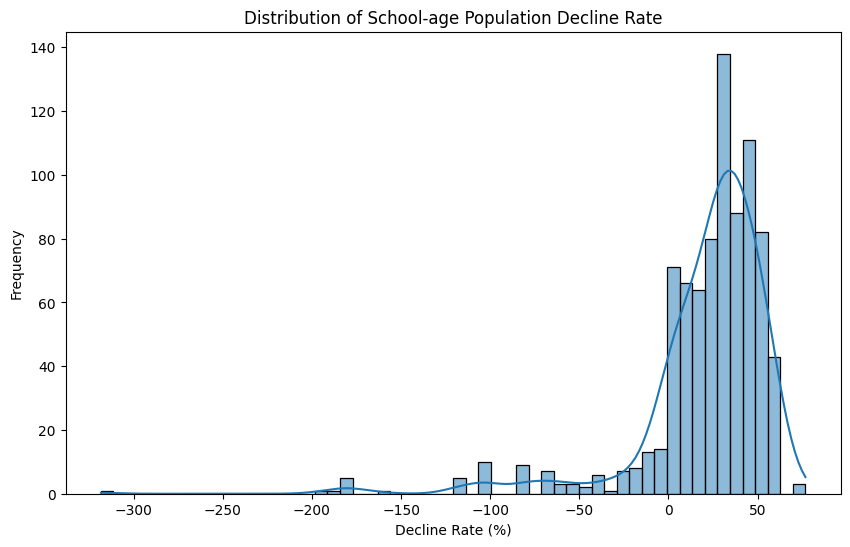

count    843.000000
mean      21.013054
std       38.449342
min     -318.379531
25%       10.085541
50%       30.000000
75%       43.858627
max       76.814815
Name: 학령 인구 감소율, dtype: float64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

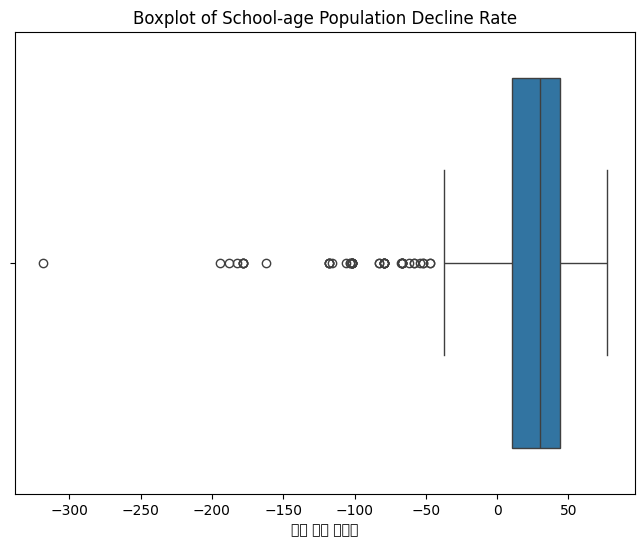

In [ ]:
# prompt: busan['학령 인구 감소율'] 의 분포 확인

import matplotlib.pyplot as plt
import seaborn as sns

# '학령 인구 감소율' 컬럼의 분포 확인 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(busan['학령 인구 감소율'], kde=True)  # kde=True로 밀도 함수 추가
plt.title('Distribution of School-age Population Decline Rate')
plt.xlabel('Decline Rate (%)')
plt.ylabel('Frequency')
plt.show()

# '학령 인구 감소율' 컬럼의 기술 통계량 확인
print(busan['학령 인구 감소율'].describe())

# 박스 플롯으로 이상치 확인
plt.figure(figsize=(8, 6))
sns.boxplot(x=busan['학령 인구 감소율'])
plt.title('Boxplot of School-age Population Decline Rate')
plt.show()

In [ ]:
# prompt: 아웃라이어 행들을 실제로 확인하고싶어요

# '학령 인구 감소율'이 NaN인 행 확인
nan_decline_rows = busan[busan['학령 인구 감소율'].isnull()]
print(nan_decline_rows)

# '학령 인구 감소율'이 특정 범위를 벗어나는 행 확인 (예: -100% 미만 또는 100% 초과)
outlier_decline_rows = busan[(busan['학령 인구 감소율'] < -100) | (busan['학령 인구 감소율'] > 100)]
print(outlier_decline_rows)

# '학령 인구 감소율'의 이상치를 정의하고 필터링합니다.
# 예를 들어, IQR 규칙을 사용하여 이상치를 식별합니다.
Q1 = busan['학령 인구 감소율'].quantile(0.25)
Q3 = busan['학령 인구 감소율'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_iqr_rows = busan[(busan['학령 인구 감소율'] < lower_bound) | (busan['학령 인구 감소율'] > upper_bound)]
outlier_iqr_rows

         시도   시군구          어린이집명 어린이집유형구분 운영현황  보육실수  보육실면적  놀이터수  CCTV설치수  \
75    부산광역시    서구       아미행복어린이집      국공립   정상     5    225     4       13   
122   부산광역시    동구       좋은문화어린이집       직장   폐지     2     26     0        5   
378   부산광역시  부산진구         초록어린이집       가정   폐지     3     84     0        3   
407   부산광역시  부산진구  양정포레힐즈스위첸어린이집      국공립   정상     5    121     0        8   
408   부산광역시  부산진구    서면비스타동원어린이집      국공립   정상     4    164     0       11   
...     ...   ...            ...      ...  ...   ...    ...   ...      ...   
2446  부산광역시   기장군        엄마품어린이집       가정   폐지     3     64     0        4   
2449  부산광역시   기장군      솔마루햇살어린이집       민간   폐지     7    182     1       10   
2456  부산광역시   기장군         오즈어린이집       민간   폐지     7    243     1       16   
2476  부산광역시   기장군       삼정그린어린이집       민간   폐지     9    448     2       15   
2501  부산광역시   기장군         자연어린이집      국공립   정상     5     66     2        5   

      보육교직원수  ...          경도  통학차량운영여부       인가일자       폐지일자 운

,시도,시군구,어린이집명,어린이집유형구분,운영현황,보육실수,보육실면적,놀이터수,CCTV설치수,보육교직원수,...,경도,통학차량운영여부,인가일자,폐지일자,운영현황_타겟,운영연수,최소_보육실면적,통학차량운영여부_인코딩,어린이집유형구분_인코딩,학령 인구 감소율
1699,부산광역시,강서구,대사라온어린이집,민간,휴지,7,236,1,8,0,...,128.934840,운영,2012-12-31,NaT,0,11.953425,166.32,1,2,-101.702259
1719,부산광역시,강서구,아이캐슬어린이집,민간,정상,4,146,1,6,12,...,128.906155,미운영,2009-01-08,NaT,0,15.934247,108.24,0,2,-177.910448
1722,부산광역시,강서구,극동스타어린이집,민간,폐지,5,127,1,9,0,...,128.901242,미운영,2009-03-24,2018-12-06,1,9.709589,126.72,0,2,-318.379531
1723,부산광역시,강서구,롯데캐슬어린이집,가정,정상,4,77,1,4,8,...,128.906078,운영,2009-04-03,NaT,0,15.701370,52.80,1,0,-177.910448
1724,부산광역시,강서구,윌어린이집,민간,정상,3,118,0,4,8,...,128.879019,미운영,2009-04-10,NaT,0,15.682192,68.64,0,2,-177.910448
1725,부산광역시,강서구,아가사랑어린이집,가정,정상,3,61,2,4,5,...,128.901242,미운영,2009-09-16,NaT,0,15.246575,52.80,0,0,-177.910448
1726,부산광역시,강서구,링컨어린이집,민간,정상,4,138,0,5,10,...,128.897841,미운영,2011-03-10,NaT,0,13.767123,79.20,0,2,-117.741397
1727,부산광역시,강서구,에디슨어린이집,민간,정상,4,131,0,5,7,...,128.897986,미운영,2011-04-04,NaT,0,13.698630,79.20,0,2,-117.741397
1728,부산광역시,강서구,아인슈타인어린이집,민간,정상,3,144,0,8,10,...,128.897986,미운영,2011-04-04,NaT,0,13.698630,84.48,0,2,-117.741397
1729,부산광역시,강서구,노리숲어린이집,가정,정상,4,82,0,5,6,...,128.913906,미운영,2011-11-11,NaT,0,13.093151,52.80,0,0,-117.741397


In [ ]:
busan['학령 인구 감소율'].isnull().sum()

67

In [ ]:
nan_decline_rows

,시도,시군구,어린이집명,어린이집유형구분,운영현황,보육실수,보육실면적,놀이터수,CCTV설치수,보육교직원수,...,경도,통학차량운영여부,인가일자,폐지일자,운영현황_타겟,운영연수,최소_보육실면적,통학차량운영여부_인코딩,어린이집유형구분_인코딩,학령 인구 감소율
75,부산광역시,서구,아미행복어린이집,국공립,정상,5,225,4,13,7,...,129.011039,미운영,2024-03-01,NaT,0,0.780822,192.72,0,1,NaN
122,부산광역시,동구,좋은문화어린이집,직장,폐지,2,26,0,5,0,...,129.058292,미운영,2016-05-02,2024-03-01,1,7.835616,23.76,0,5,NaN
378,부산광역시,부산진구,초록어린이집,가정,폐지,3,84,0,3,0,...,129.038466,미운영,2014-08-01,2024-02-01,1,9.509589,50.16,0,0,NaN
407,부산광역시,부산진구,양정포레힐즈스위첸어린이집,국공립,정상,5,121,0,8,10,...,129.079086,미운영,2024-03-01,NaT,0,0.780822,92.40,0,1,NaN
408,부산광역시,부산진구,서면비스타동원어린이집,국공립,정상,4,164,0,11,11,...,129.037842,미운영,2024-03-01,NaT,0,0.780822,129.36,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,부산광역시,기장군,엄마품어린이집,가정,폐지,3,64,0,4,0,...,129.164608,운영,2014-07-03,2024-04-12,1,9.783562,52.80,1,0,NaN
2449,부산광역시,기장군,솔마루햇살어린이집,민간,폐지,7,182,1,10,0,...,129.167183,운영,2014-07-10,2024-03-22,1,9.706849,161.04,1,2,NaN
2456,부산광역시,기장군,오즈어린이집,민간,폐지,7,243,1,16,0,...,129.172105,운영,2015-01-09,2024-02-15,1,9.106849,102.96,1,2,NaN
2476,부산광역시,기장군,삼정그린어린이집,민간,폐지,9,448,2,15,0,...,129.387999,운영,2018-03-13,2024-09-30,1,6.556164,396.00,1,2,NaN


In [ ]:
def calculate_decline_rate_for_row(row):
    """busan 각 행에 대한 학령 인구 감소율 계산"""
    if pd.isna(row['인가일자']):
        return None

    region = row['시군구']  # 수정된 지역명 사용
    start_year = row['인가일자'].year  # Timestamp 객체에서 연도 추출

    # 종료 연도 결정
    if row['운영현황_타겟'] == 0:
        end_year = 2023  # 운영현황_타겟이 0인 경우 2023년까지
    elif pd.notna(row['폐지일자']):
        end_year = row['폐지일자'].year
        if end_year > 2023:  # 폐지일자가 2024년인 경우
            end_year = 2023
    else:
        end_year = 2023  # 종료 연도가 없으면 2023년 기준

    return calculate_decline_rate(start_year, end_year, region)

# busan 데이터프레임에 학령 인구 감소율 업데이트
busan['학령 인구 감소율'] = busan.apply(calculate_decline_rate_for_row, axis=1)

# 결과 확인
print(busan[['시도', '시군구', '학령 인구 감소율']].head())


       시도 시군구  학령 인구 감소율
13  부산광역시  중구  76.814815
15  부산광역시  중구  75.904542
16  부산광역시  중구  69.787645
55  부산광역시  서구  41.214751
65  부산광역시  서구  37.660204


In [ ]:
nan_decline_rows = busan[busan['학령 인구 감소율'].isnull()]

In [ ]:
nan_decline_rows

,시도,시군구,어린이집명,어린이집유형구분,운영현황,보육실수,보육실면적,놀이터수,CCTV설치수,보육교직원수,...,경도,통학차량운영여부,인가일자,폐지일자,운영현황_타겟,운영연수,최소_보육실면적,통학차량운영여부_인코딩,어린이집유형구분_인코딩,학령 인구 감소율
75,부산광역시,서구,아미행복어린이집,국공립,정상,5,225,4,13,7,...,129.011039,미운영,2024-03-01,NaT,0,0.780822,192.72,0,1,NaN
407,부산광역시,부산진구,양정포레힐즈스위첸어린이집,국공립,정상,5,121,0,8,10,...,129.079086,미운영,2024-03-01,NaT,0,0.780822,92.40,0,1,NaN
408,부산광역시,부산진구,서면비스타동원어린이집,국공립,정상,4,164,0,11,11,...,129.037842,미운영,2024-03-01,NaT,0,0.780822,129.36,0,1,NaN
409,부산광역시,부산진구,서면롯데캐슬엘루체어린이집,국공립,정상,4,130,0,8,11,...,129.052745,미운영,2024-03-01,NaT,0,0.780822,118.80,0,1,NaN
410,부산광역시,부산진구,시민공원삼정더베스트어린이집,민간,정상,4,130,0,7,10,...,127.003892,미운영,2024-05-28,NaT,0,0.539726,126.72,0,2,NaN
411,부산광역시,부산진구,롯데캐슬라센트어린이집,국공립,정상,6,281,1,16,10,...,129.035486,미운영,2024-09-01,NaT,0,0.276712,224.40,0,1,NaN
412,부산광역시,부산진구,하늘채포레스원어린이집,국공립,정상,5,247,1,12,11,...,129.049665,미운영,2024-09-01,NaT,0,0.276712,171.60,0,1,NaN
582,부산광역시,동래구,사직하늘채리센티아어린이집,국공립,정상,5,132,0,8,11,...,129.060634,미운영,2024-09-01,NaT,0,0.276712,129.36,0,1,NaN
770,부산광역시,남구,(공립)대연푸르지오클라센트어린이집,국공립,정상,4,166,0,6,12,...,126.977963,미운영,2024-01-08,NaT,0,0.926027,110.88,0,1,NaN
771,부산광역시,남구,해솔어린이집,협동,정상,4,153,0,0,6,...,129.111322,운영,2024-02-20,NaT,0,0.808219,50.16,1,6,NaN


In [ ]:
def calculate_decline_rate_for_row(row):
    """busan 각 행에 대한 학령 인구 감소율 계산"""
    if pd.isna(row['인가일자']):
        return None

    region = row['시군구']  # 수정된 지역명 사용

    # 인가일자가 2024년이면 2023년으로 설정
    start_year = row['인가일자'].year
    if start_year > 2023:  # 인가일자가 2024년인 경우
        start_year = 2023

    # 종료 연도 결정
    if row['운영현황_타겟'] == 0:
        end_year = 2023  # 운영현황_타겟이 0인 경우 2023년까지
    elif pd.notna(row['폐지일자']):
        end_year = row['폐지일자'].year
        if end_year > 2023:  # 폐지일자가 2024년인 경우
            end_year = 2023
    else:
        end_year = 2023  # 종료 연도가 없으면 2023년 기준

    return calculate_decline_rate(start_year, end_year, region)

# busan 데이터프레임에 학령 인구 감소율 업데이트
busan['학령 인구 감소율'] = busan.apply(calculate_decline_rate_for_row, axis=1)

# 결과 확인
print(busan[['시도', '시군구', '학령 인구 감소율']].head())


       시도 시군구  학령 인구 감소율
13  부산광역시  중구  76.814815
15  부산광역시  중구  75.904542
16  부산광역시  중구  69.787645
55  부산광역시  서구  41.214751
65  부산광역시  서구  37.660204


In [ ]:
nan_decline_rows = busan[busan['학령 인구 감소율'].isnull()]

In [ ]:
zero_decline_rows = busan[busan['학령 인구 감소율'] == 0]

In [ ]:
zero_decline_rows

,시도,시군구,어린이집명,어린이집유형구분,운영현황,보육실수,보육실면적,놀이터수,CCTV설치수,보육교직원수,...,경도,통학차량운영여부,인가일자,폐지일자,운영현황_타겟,운영연수,최소_보육실면적,통학차량운영여부_인코딩,어린이집유형구분_인코딩,학령 인구 감소율
74,부산광역시,서구,해모로어린이집,국공립,정상,4,128,1,7,11,...,129.010919,미운영,2023-03-01,NaT,0,1.783562,100.32,0,1,0.0
75,부산광역시,서구,아미행복어린이집,국공립,정상,5,225,4,13,7,...,129.011039,미운영,2024-03-01,NaT,0,0.780822,192.72,0,1,0.0
129,부산광역시,동구,두산하버시티어린이집,국공립,정상,5,207,1,8,17,...,129.057830,미운영,2023-06-01,NaT,0,1.531507,203.28,0,1,0.0
194,부산광역시,영도구,오션라이프에일린의뜰1단지어린이집,국공립,정상,5,146,1,7,9,...,129.073589,미운영,2023-12-01,NaT,0,1.030137,134.64,0,1,0.0
195,부산광역시,영도구,오션라이프에일린의뜰2단지어린이집,국공립,정상,5,120,1,7,9,...,126.977963,미운영,2023-12-01,NaT,0,1.030137,118.80,0,1,0.0
401,부산광역시,부산진구,래미안어반파크어린이집,국공립,정상,5,238,1,9,16,...,129.051798,미운영,2023-03-01,NaT,0,1.783562,224.40,0,1,0.0
402,부산광역시,부산진구,이편한세상시민공원어린이집,국공립,정상,5,296,1,7,14,...,129.067705,미운영,2023-03-01,NaT,0,1.783562,171.60,0,1,0.0
403,부산광역시,부산진구,롯데캐슬골드아너어린이집,국공립,정상,5,219,1,7,12,...,129.030742,미운영,2023-03-01,NaT,0,1.783562,129.36,0,1,0.0
404,부산광역시,부산진구,꼬마동산어린이집,국공립,정상,4,84,0,5,9,...,129.031560,운영,2023-03-01,NaT,0,1.783562,52.80,1,1,0.0
405,부산광역시,부산진구,곤지곤지어린이집,국공립,정상,4,84,0,6,9,...,129.723986,미운영,2023-03-01,NaT,0,1.783562,52.80,0,1,0.0


In [ ]:
features = [
    '보육실수', '보육실면적', '놀이터수', 'CCTV설치수', '정원수',
    '통학차량운영여부_인코딩', '운영연수', '어린이집유형구분_인코딩', '학령 인구 감소율'
]

from sklearn.model_selection import train_test_split

# 독립 변수와 타겟 변수 정의
X = busan[features]
y = busan['운영현황_타겟']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"훈련 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

훈련 데이터 크기: (637, 9), 테스트 데이터 크기: (273, 9)


In [ ]:
from xgboost import XGBClassifier

# 모델 학습
xgb_model = XGBClassifier(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)

# 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       186
           1       0.79      0.74      0.76        87

    accuracy                           0.85       273
   macro avg       0.84      0.82      0.83       273
weighted avg       0.85      0.85      0.85       273

F1 Score: 0.7619047619047619


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       186
           1       0.77      0.66      0.71        87

    accuracy                           0.83       273
   macro avg       0.81      0.78      0.79       273
weighted avg       0.82      0.83      0.82       273

F1 Score: 0.7080745341614907


In [ ]:
busan_density = pd.read_csv('/content/drive/MyDrive/기계학습 2조/부산/부산_인구밀도.csv')
busan_density

,구·군별,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,구·군별,인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢)
1,부산광역시,4695,4666,4692,4667,4643,4629,4621,4624,4607,4572,4538,4502,4465,4410,4372,4343
2,중구,17960,17724,17927,17680,17458,17178,16982,16795,16649,16278,15849,15573,15412,15056,14809,13672
3,서구,9423,9156,9155,8993,8793,8618,8579,8443,8220,8008,8056,7893,7883,7681,7699,7633
4,동구,10634,10474,10517,10467,10268,10015,9868,9638,9426,9328,9152,9167,9235,9089,8977,8912
5,영도구,10908,10601,10505,10254,10009,9727,9452,9276,9039,8833,8587,8354,8109,7919,7764,7687
6,부산진구,13573,13409,13411,13385,13305,13202,13116,12939,12780,12622,12313,12169,12225,11995,12088,12218
7,동래구,17037,16968,17056,17117,16825,16692,16646,16476,16473,16354,16100,16386,16354,16116,16503,16367
8,남구,11370,11309,11278,11144,10991,11011,10822,10703,10558,10418,10671,10472,10184,9971,9778,9728
9,북구,8123,8002,7950,7857,7980,7898,7831,7927,7929,7748,7609,7460,7272,7249,7136,7005


In [ ]:
# 1. '구·군별' -> '시군구'로 컬럼명 변경 및 공백 제거
busan_density.rename(columns={'구·군별': '시군구'}, inplace=True)
busan_density['시군구'] = busan_density['시군구'].str.strip()

In [ ]:
busan_density

,시군구,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,구·군별,인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢),인구밀도 (명/㎢)
1,부산광역시,4695,4666,4692,4667,4643,4629,4621,4624,4607,4572,4538,4502,4465,4410,4372,4343
2,중구,17960,17724,17927,17680,17458,17178,16982,16795,16649,16278,15849,15573,15412,15056,14809,13672
3,서구,9423,9156,9155,8993,8793,8618,8579,8443,8220,8008,8056,7893,7883,7681,7699,7633
4,동구,10634,10474,10517,10467,10268,10015,9868,9638,9426,9328,9152,9167,9235,9089,8977,8912
5,영도구,10908,10601,10505,10254,10009,9727,9452,9276,9039,8833,8587,8354,8109,7919,7764,7687
6,부산진구,13573,13409,13411,13385,13305,13202,13116,12939,12780,12622,12313,12169,12225,11995,12088,12218
7,동래구,17037,16968,17056,17117,16825,16692,16646,16476,16473,16354,16100,16386,16354,16116,16503,16367
8,남구,11370,11309,11278,11144,10991,11011,10822,10703,10558,10418,10671,10472,10184,9971,9778,9728
9,북구,8123,8002,7950,7857,7980,7898,7831,7927,7929,7748,7609,7460,7272,7249,7136,7005


In [ ]:
# 2. 종료 연도의 인구밀도 계산 함수

def calculate_end_year_density(row):
    """폐지된 연도의 인구밀도 또는 운영 중이면 2023년의 인구밀도"""
    if pd.isna(row['인가일자']):
        return None

    region = row['시군구']  # 지역명
    if row['운영현황_타겟'] == 0:  # 운영 중인 경우
        end_year = 2023
    elif pd.notna(row['폐지일자']):  # 폐지된 경우
        end_year = row['폐지일자'].year
        if end_year > 2023:  # 폐지 연도가 2024년 이상이면 2023년으로 간주
            end_year = 2023
    else:
        end_year = 2023  # 기본적으로 2023년 사용

    # 종료 연도의 인구밀도 가져오기
    try:
        return busan_density.loc[busan_density['시군구'] == region, str(end_year)].values[0]
    except (KeyError, IndexError):
        return None

# 3. 종료연도의 인구밀도 추가
busan['종료연도_인구밀도'] = busan.apply(calculate_end_year_density, axis=1)

# 결측치 개수 확인
print(f"결측치 개수: {busan['종료연도_인구밀도'].isnull().sum()}")

# 결과 확인
busan[['시군구', '종료연도_인구밀도']].head()

결측치 개수: 0


,시군구,종료연도_인구밀도
13,중구,13672
15,중구,13672
16,중구,13672
55,서구,7633
65,서구,7633


In [ ]:
busan

,시도,시군구,어린이집명,어린이집유형구분,운영현황,보육실수,보육실면적,놀이터수,CCTV설치수,보육교직원수,...,통학차량운영여부,인가일자,폐지일자,운영현황_타겟,운영연수,최소_보육실면적,통학차량운영여부_인코딩,어린이집유형구분_인코딩,학령 인구 감소율,종료연도_인구밀도
13,부산광역시,중구,부산세관어린이집,직장,정상,5,286,1,10,12,...,미운영,2008-07-01,NaT,0,16.457534,198.00,0,5,76.814815,13672
15,부산광역시,중구,다사랑어린이집,국공립,정상,4,132,0,8,10,...,운영,2011-07-01,NaT,0,13.457534,129.36,1,1,75.904542,13672
16,부산광역시,중구,메리놀병원어린이집,직장,정상,3,113,0,7,6,...,미운영,2016-03-11,NaT,0,8.758904,52.80,0,5,69.787645,13672
55,부산광역시,서구,아이숲어린이집,가정,정상,4,68,0,5,5,...,운영,2011-08-24,NaT,0,13.309589,52.80,1,0,41.214751,7633
65,부산광역시,서구,풀잎어린이집,국공립,정상,5,122,0,10,11,...,운영,2013-07-26,NaT,0,11.386301,113.52,1,1,37.660204,7633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,부산광역시,기장군,기장웨이브리즈어린이집,국공립,정상,8,576,1,15,25,...,미운영,2022-09-02,NaT,0,2.276712,258.72,0,1,12.047460,831
2498,부산광역시,기장군,사랑둥이어린이집,국공립,정상,4,76,0,6,9,...,운영,2023-05-01,NaT,0,1.616438,52.80,1,1,0.000000,831
2499,부산광역시,기장군,일광이지더원3차메르센포레어린이집,국공립,정상,3,102,0,6,13,...,미운영,2023-04-25,NaT,0,1.632877,97.68,0,1,0.000000,831
2500,부산광역시,기장군,일광금호센트럴베이행복어린이집,국공립,정상,6,323,3,16,10,...,미운영,2023-06-07,NaT,0,1.515068,208.56,0,1,0.000000,831


In [ ]:
busan['종료연도_인구밀도'] = pd.to_numeric(busan['종료연도_인구밀도'], errors='coerce')

In [ ]:
features = [
    '보육실수', '보육실면적', '놀이터수', 'CCTV설치수', '정원수',
    '통학차량운영여부_인코딩', '운영연수', '어린이집유형구분_인코딩', '학령 인구 감소율', '종료연도_인구밀도'
]

from sklearn.model_selection import train_test_split

# 독립 변수와 타겟 변수 정의
X = busan[features]
y = busan['운영현황_타겟']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"훈련 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

훈련 데이터 크기: (637, 10), 테스트 데이터 크기: (273, 10)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       186
           1       0.80      0.64      0.71        87

    accuracy                           0.84       273
   macro avg       0.82      0.78      0.80       273
weighted avg       0.83      0.84      0.83       273

F1 Score: 0.7133757961783439


In [ ]:
from xgboost import XGBClassifier

# 모델 학습
xgb_model = XGBClassifier(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)

# 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       186
           1       0.83      0.75      0.79        87

    accuracy                           0.87       273
   macro avg       0.86      0.84      0.85       273
weighted avg       0.87      0.87      0.87       273

F1 Score: 0.7878787878787878


In [ ]:
def calculate_childcare_density(row):
    """운영 중인 어린이집과 폐원한 어린이집의 지역 내 보육원 밀집도 계산"""
    region = row['시군구']  # 해당 어린이집이 위치한 지역

    if row['운영현황_타겟'] == 0:  # 운영 중인 어린이집
        year = 2023  # 2023년 기준으로 계산
    elif pd.notna(row['폐지일자']):  # 폐원한 어린이집
        year = row['폐지일자'].year
        if year > 2023:  # 폐지일자가 2024년 이상이면 2023년으로 설정
            year = 2023
    else:
        return None  # 폐지일자가 없는 경우 계산 불가

    # 해당 연도의 지역 내 보육원 수와 인구 밀집도 계산
    try:
        # 지역 내 어린이집 수 계산
        childcare_count = busan.loc[
            (busan['시군구'] == region) &
            (busan['인가일자'].dt.year <= year) &
            ((busan['폐지일자'].dt.year >= year) | (pd.isna(busan['폐지일자']))),
            '시군구'
        ].count()

        # 해당 연도의 인구 데이터 (쉼표 제거 후 숫자로 변환)
        population = busan_population.loc[busan_population['행정구역'] == region, str(year)].values[0]
        population = int(population.replace(',', ''))  # 쉼표 제거 후 숫자로 변환

        return childcare_count / population  # 보육원 밀집도 = 보육원 수 / 지역 인구
    except (KeyError, IndexError, ValueError) as e:
        print(f"Error processing row: {row['시군구']} for year {year} - {e}")
        return None

# 지역 내 보육원 밀집도 계산 및 추가
busan['지역_보육원_밀집도'] = busan.apply(calculate_childcare_density, axis=1)

# features 리스트에 추가
features.append('지역_보육원_밀집도')

# 결과 확인
print(busan[['시군구', '지역_보육원_밀집도']].head())


   시군구  지역_보육원_밀집도
13  중구    0.009585
15  중구    0.009585
16  중구    0.009585
55  서구    0.005799
65  서구    0.005799


In [ ]:
busan

,시도,시군구,어린이집명,어린이집유형구분,운영현황,보육실수,보육실면적,놀이터수,CCTV설치수,보육교직원수,...,인가일자,폐지일자,운영현황_타겟,운영연수,최소_보육실면적,통학차량운영여부_인코딩,어린이집유형구분_인코딩,학령 인구 감소율,종료연도_인구밀도,지역_보육원_밀집도
13,부산광역시,중구,부산세관어린이집,직장,정상,5,286,1,10,12,...,2008-07-01,NaT,0,16.457534,198.00,0,5,76.814815,13672,0.009585
15,부산광역시,중구,다사랑어린이집,국공립,정상,4,132,0,8,10,...,2011-07-01,NaT,0,13.457534,129.36,1,1,75.904542,13672,0.009585
16,부산광역시,중구,메리놀병원어린이집,직장,정상,3,113,0,7,6,...,2016-03-11,NaT,0,8.758904,52.80,0,5,69.787645,13672,0.009585
55,부산광역시,서구,아이숲어린이집,가정,정상,4,68,0,5,5,...,2011-08-24,NaT,0,13.309589,52.80,1,0,41.214751,7633,0.005799
65,부산광역시,서구,풀잎어린이집,국공립,정상,5,122,0,10,11,...,2013-07-26,NaT,0,11.386301,113.52,1,1,37.660204,7633,0.005799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,부산광역시,기장군,기장웨이브리즈어린이집,국공립,정상,8,576,1,15,25,...,2022-09-02,NaT,0,2.276712,258.72,0,1,12.047460,831,0.021446
2498,부산광역시,기장군,사랑둥이어린이집,국공립,정상,4,76,0,6,9,...,2023-05-01,NaT,0,1.616438,52.80,1,1,0.000000,831,0.021446
2499,부산광역시,기장군,일광이지더원3차메르센포레어린이집,국공립,정상,3,102,0,6,13,...,2023-04-25,NaT,0,1.632877,97.68,0,1,0.000000,831,0.021446
2500,부산광역시,기장군,일광금호센트럴베이행복어린이집,국공립,정상,6,323,3,16,10,...,2023-06-07,NaT,0,1.515068,208.56,0,1,0.000000,831,0.021446


In [ ]:
features = [
    '보육실수', '보육실면적', '놀이터수', 'CCTV설치수', '정원수',
    '통학차량운영여부_인코딩', '운영연수', '어린이집유형구분_인코딩', '학령 인구 감소율', '종료연도_인구밀도','지역_보육원_밀집도'
]

from sklearn.model_selection import train_test_split

# 독립 변수와 타겟 변수 정의
X = busan[features]
y = busan['운영현황_타겟']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"훈련 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

훈련 데이터 크기: (637, 11), 테스트 데이터 크기: (273, 11)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       186
           1       0.86      0.71      0.78        87

    accuracy                           0.87       273
   macro avg       0.87      0.83      0.84       273
weighted avg       0.87      0.87      0.87       273

F1 Score: 0.779874213836478


In [ ]:
from xgboost import XGBClassifier

# 모델 학습
xgb_model = XGBClassifier(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)

# 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       186
           1       0.86      0.79      0.83        87

    accuracy                           0.89       273
   macro avg       0.88      0.87      0.87       273
weighted avg       0.89      0.89      0.89       273

F1 Score: 0.8263473053892215


In [ ]:
# 정원 대비 보육실 면적 비율 계산
busan['보육실_면적비율'] = busan['보육실면적'] / busan['정원수']
features.append('보육실_면적비율')

In [ ]:
busan

,시도,시군구,어린이집명,어린이집유형구분,운영현황,보육실수,보육실면적,놀이터수,CCTV설치수,보육교직원수,...,폐지일자,운영현황_타겟,운영연수,최소_보육실면적,통학차량운영여부_인코딩,어린이집유형구분_인코딩,학령 인구 감소율,종료연도_인구밀도,지역_보육원_밀집도,보육실_면적비율
13,부산광역시,중구,부산세관어린이집,직장,정상,5,286,1,10,12,...,NaT,0,16.457534,198.00,0,5,76.814815,13672,0.009585,3.813333
15,부산광역시,중구,다사랑어린이집,국공립,정상,4,132,0,8,10,...,NaT,0,13.457534,129.36,1,1,75.904542,13672,0.009585,2.693878
16,부산광역시,중구,메리놀병원어린이집,직장,정상,3,113,0,7,6,...,NaT,0,8.758904,52.80,0,5,69.787645,13672,0.009585,5.650000
55,부산광역시,서구,아이숲어린이집,가정,정상,4,68,0,5,5,...,NaT,0,13.309589,52.80,1,0,41.214751,7633,0.005799,3.400000
65,부산광역시,서구,풀잎어린이집,국공립,정상,5,122,0,10,11,...,NaT,0,11.386301,113.52,1,1,37.660204,7633,0.005799,2.837209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,부산광역시,기장군,기장웨이브리즈어린이집,국공립,정상,8,576,1,15,25,...,NaT,0,2.276712,258.72,0,1,12.047460,831,0.021446,5.877551
2498,부산광역시,기장군,사랑둥이어린이집,국공립,정상,4,76,0,6,9,...,NaT,0,1.616438,52.80,1,1,0.000000,831,0.021446,3.800000
2499,부산광역시,기장군,일광이지더원3차메르센포레어린이집,국공립,정상,3,102,0,6,13,...,NaT,0,1.632877,97.68,0,1,0.000000,831,0.021446,2.756757
2500,부산광역시,기장군,일광금호센트럴베이행복어린이집,국공립,정상,6,323,3,16,10,...,NaT,0,1.515068,208.56,0,1,0.000000,831,0.021446,4.088608


In [ ]:
features = [
    '보육실수', '놀이터수', 'CCTV설치수', '정원수',
    '통학차량운영여부_인코딩', '운영연수', '어린이집유형구분_인코딩', '학령 인구 감소율', '종료연도_인구밀도','지역_보육원_밀집도',
    '보육실_면적비율'
]

from sklearn.model_selection import train_test_split

# 독립 변수와 타겟 변수 정의
X = busan[features]
y = busan['운영현황_타겟']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"훈련 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

훈련 데이터 크기: (637, 11), 테스트 데이터 크기: (273, 11)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       186
           1       0.89      0.71      0.79        87

    accuracy                           0.88       273
   macro avg       0.88      0.83      0.85       273
weighted avg       0.88      0.88      0.88       273

F1 Score: 0.7898089171974523


In [ ]:
from xgboost import XGBClassifier

# 모델 학습
xgb_model = XGBClassifier(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)

# 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       186
           1       0.84      0.74      0.79        87

    accuracy                           0.87       273
   macro avg       0.86      0.84      0.85       273
weighted avg       0.87      0.87      0.87       273

F1 Score: 0.7852760736196319
